In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

In [99]:
data = pd.read_feather("sampling_base")
input_vars = pd.read_csv("input_parameters.csv")

In [100]:
len(input_vars[input_vars.gamma==3.0])

36

In [101]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

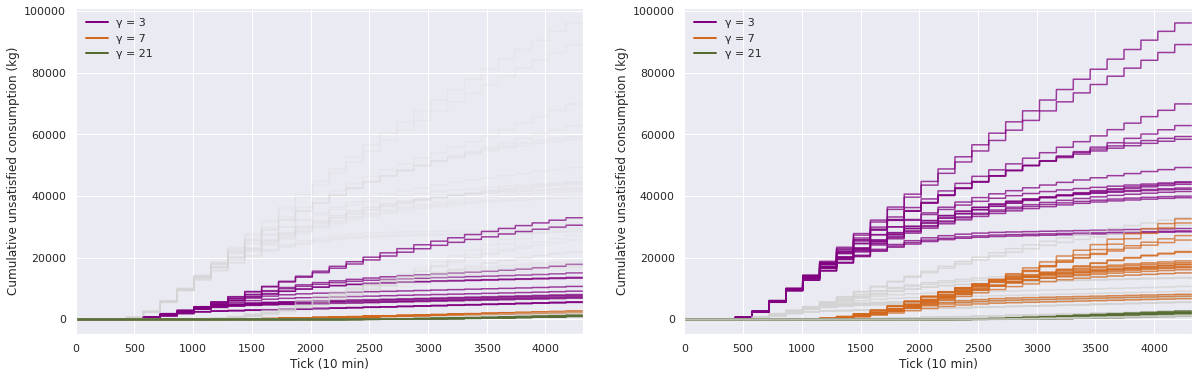

In [123]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o1[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            
        else:
            ax[0].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[1].plot( x, data.o1[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

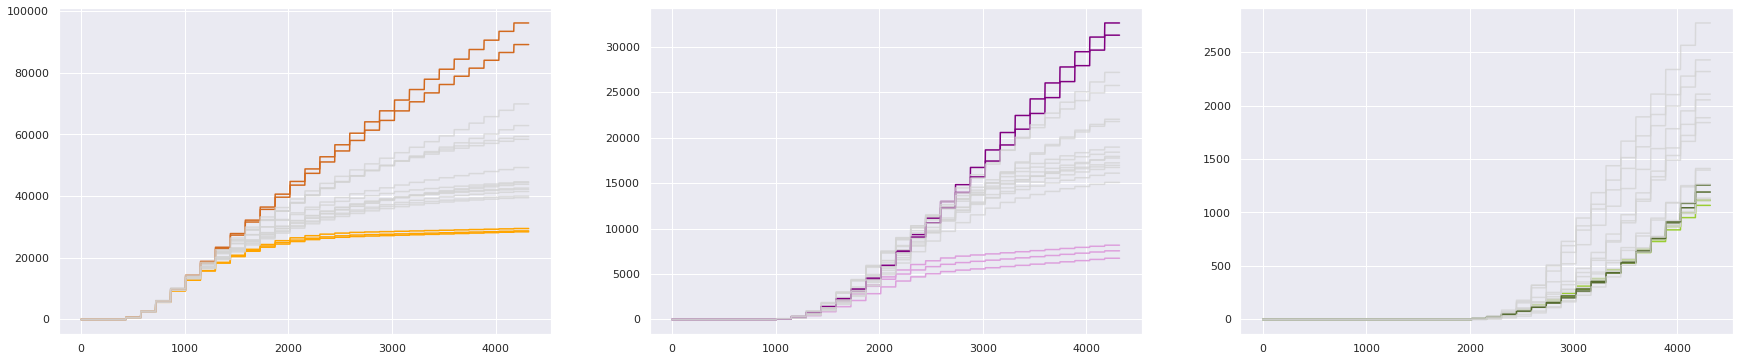

In [118]:
# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(1,3,figsize=(30,6))
        


# lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
# labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,8000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

colors = {}
colors[0] = ['chocolate','orange','lightgrey']
colors[1] = ['purple','plum','lightgrey']
colors[2] = ['darkolivegreen','yellowgreen','lightgrey']

for i in d:

    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            if (input_vars.epsilon[j] < 0.5 and input_vars.beta[j]>0.5):# or (input_vars.epsilon[j] == 0.5 and input_vars.beta[j]==0.5) :
                ax[i].plot( x, data.o1[data.o0==j],color=colors[i][0])
            elif(input_vars.beta[j]==0.0 and input_vars.alpha[j] == 0.0):
                ax[i].plot( x, data.o1[data.o0==j],color=colors[i][1])
            else:
                ax[i].plot( x, data.o1[data.o0==j],color=colors[i][2], alpha=.75)


# for a in ax:
#     a.set_ylabel("Cumulative unsatisfied consumption (kg)")
#     a.set_xlabel("Tick (10 min)")
#     a.set_xlim([0,4320])
#     a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

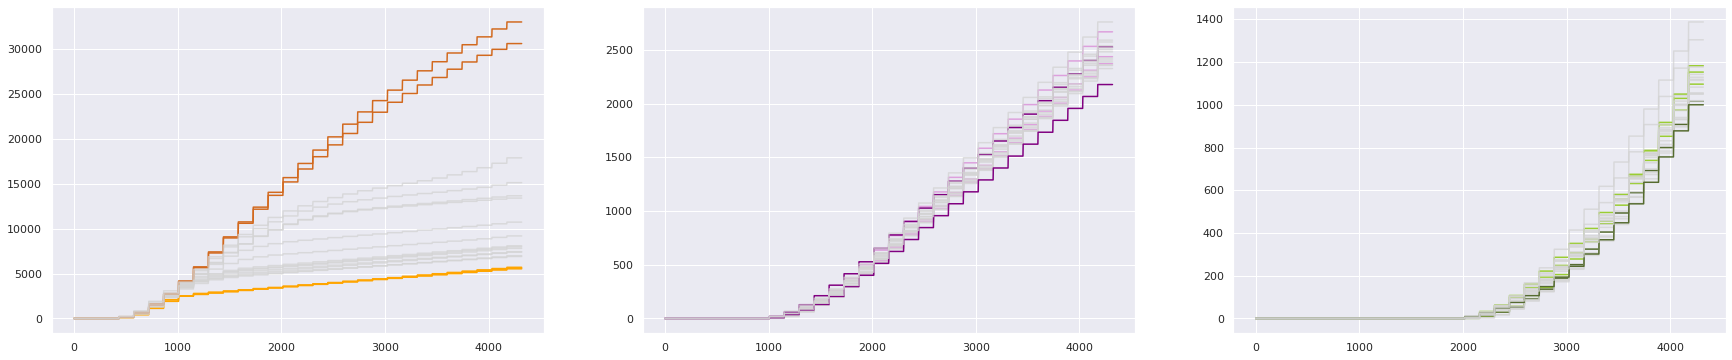

In [120]:
# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(1,3,figsize=(30,6))
        
from matplotlib.lines import Line2D

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,8000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")
colors = {}
colors[0] = ['chocolate','orange','lightgrey']
colors[1] = ['purple','plum','lightgrey']
colors[2] = ['darkolivegreen','yellowgreen','lightgrey']

for i in d:

    for j in d[i]:
        if input_vars.parallel_served_full[j] == 7.8:
            if (input_vars.epsilon[j] < 0.5 and input_vars.beta[j]>0.5):# or (input_vars.epsilon[j] == 0.5 and input_vars.beta[j]==0.5) :
                ax[i].plot( x, data.o1[data.o0==j],color=colors[i][0])
            elif(input_vars.beta[j]==0.0 and input_vars.alpha[j] == 0.0):
                ax[i].plot( x, data.o1[data.o0==j],color=colors[i][1])
            else:
                ax[i].plot( x, data.o1[data.o0==j],color=colors[i][2], alpha=.75)
# a.set_ylabel("Cumulative unsatisfied consumption (kg)")
# a.set_xlabel("Tick (10 min)")
# a.set_xlim([0,4320])
# a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

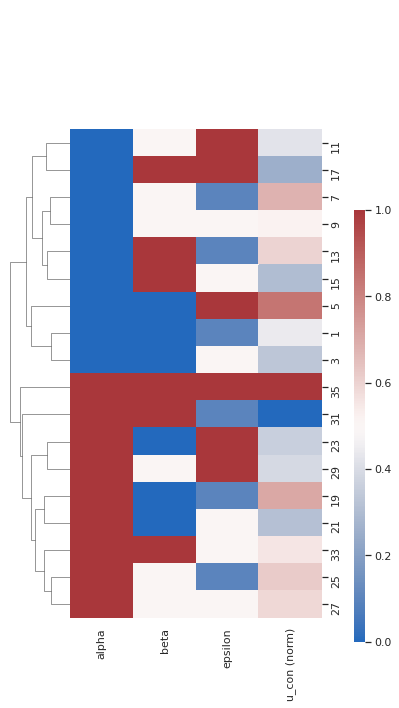

In [113]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in d[1]:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# # filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,10),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

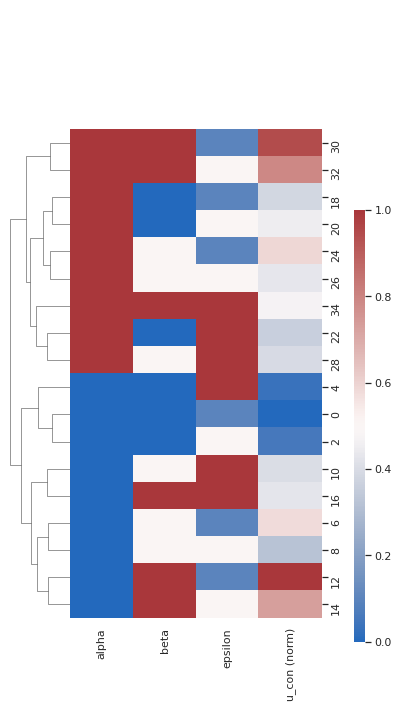

In [112]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in d[1]:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)



filtered_input_vars = input_vars.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# # filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,10),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

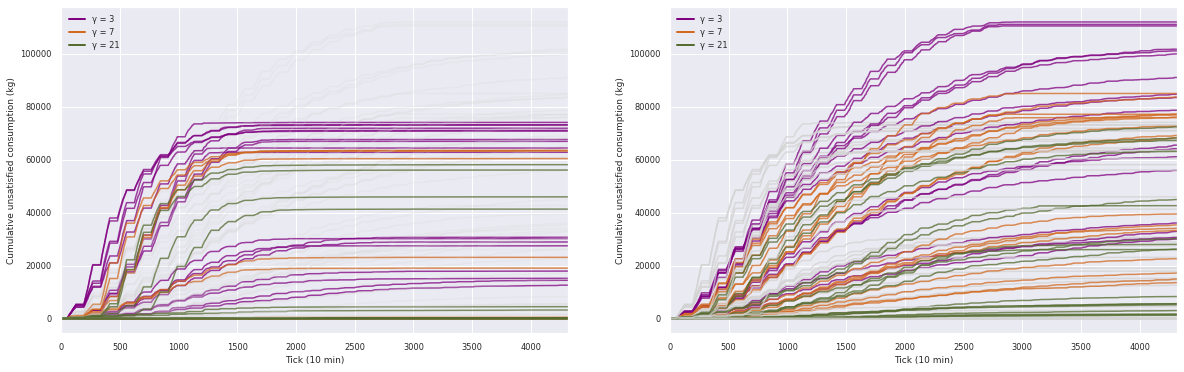

In [131]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o2[data.o0==j],color=colors[i], alpha=.75)
            
        else:
            ax[0].plot( x, data.o2[data.o0==j],color=colors[i], alpha=.75)
            ax[1].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

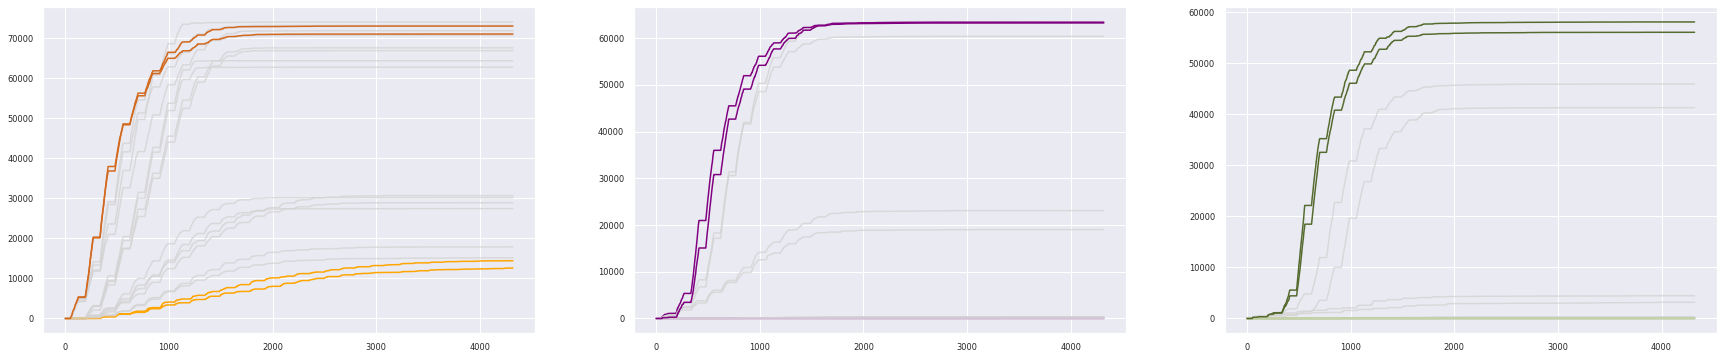

In [132]:
# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(1,3,figsize=(30,6))
        
from matplotlib.lines import Line2D

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,8000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")
colors = {}
colors[0] = ['chocolate','orange','lightgrey']
colors[1] = ['purple','plum','lightgrey']
colors[2] = ['darkolivegreen','yellowgreen','lightgrey']

for i in d:

    for j in d[i]:
        if input_vars.parallel_served_full[j] == 7.8:
            if (input_vars.epsilon[j] == 1.0 and input_vars.beta[j] == 1.0):# or (input_vars.epsilon[j] == 0.5 and input_vars.beta[j]==0.5) :
                ax[i].plot( x, data.o2[data.o0==j],color=colors[i][0])
            elif(input_vars.epsilon[j]==0.1 and input_vars.beta[j] == 1.0):
                ax[i].plot( x, data.o2[data.o0==j],color=colors[i][1])
            else:
                ax[i].plot( x, data.o2[data.o0==j],color=colors[i][2], alpha=.75)
# a.set_ylabel("Cumulative unsatisfied consumption (kg)")
# a.set_xlabel("Tick (10 min)")
# a.set_xlim([0,4320])
# a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

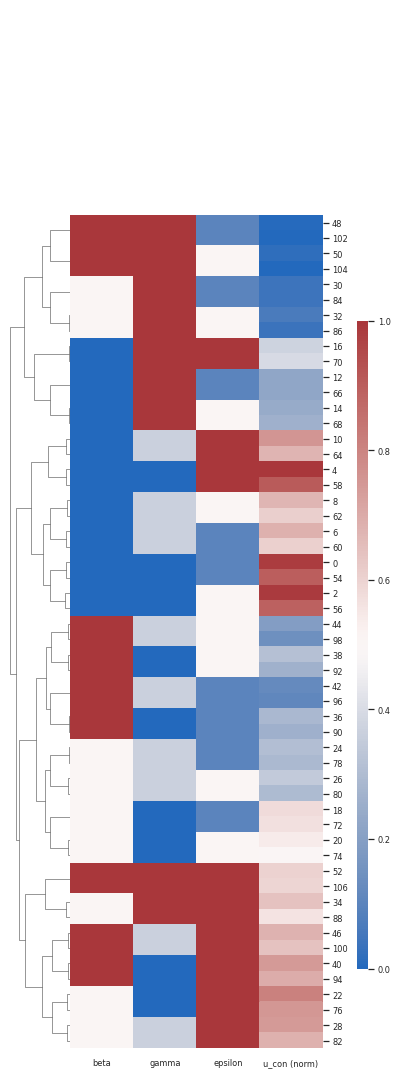

In [136]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["u_con (norm)"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)


import seaborn as sns
sns.set(font_scale=0.75)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

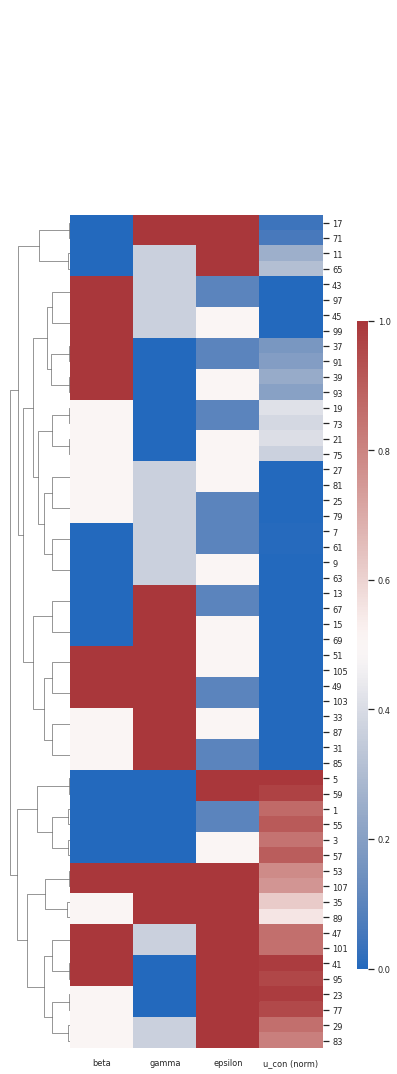

In [137]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["u_con (norm)"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)


import seaborn as sns
sns.set(font_scale=0.75)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

Alle input waarden zijn aanwezig in de set van gamma=7 (paars) en gamma=21 (oranje)

In principe doet gamma=21 het beter met lagere extreme waarde dan gamma=7. Welke combinatie van waarden brengt 21 en 7 naar elkaar toe? 

alpha: 0 and 0.5 present in orange and puprle gamma zones

epsilon 0,0.5,1.0 min of meer gelijk verdeeld over oranje en paarse gamma zones

beta = 1,0.5 allemaal in oranje -> drukker netwerk 

one run beta=0 with gamma=21

Gamma = 7 paars, gamma=21 oranje. alpha vars altijd 0 of 0.5 

## Queuing

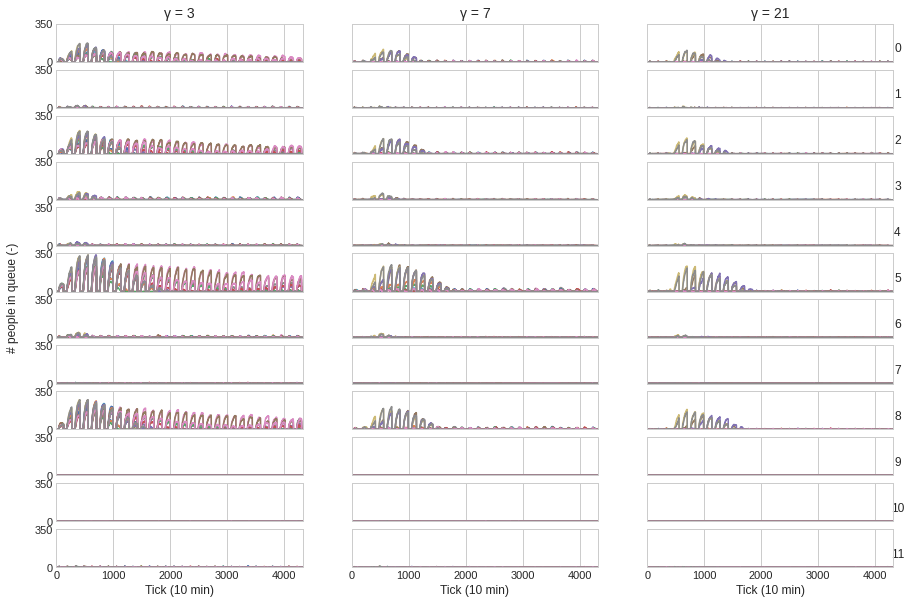

In [142]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

# Data


nb_facs = 12
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,10))

for c in range(nb_clusters):
    for i in d[c]:
        
        if input_vars.parallel_served_full[i] == 7.8:

            for f in range(nb_facs):
                ax[f,c].plot(x,data[data.o0==i].iloc[:,f+4])
                ax[f,c].set_xlim([0,4320])
                ax[f,c].set_ylim([0,350])
                ax[f,2].yaxis.set_label_position("right")
                ax[f,2].set_ylabel(f,rotation='horizontal',fontsize=12)
                ax[f,c].set_yticks([0,350])

            
    ax[0,c].set_title(labels[c],fontsize=14)
    ax[11,c].set_xlabel("Tick (10 min)")

fig.text(0.085, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/allqueues_clustered.png")

plt.show()

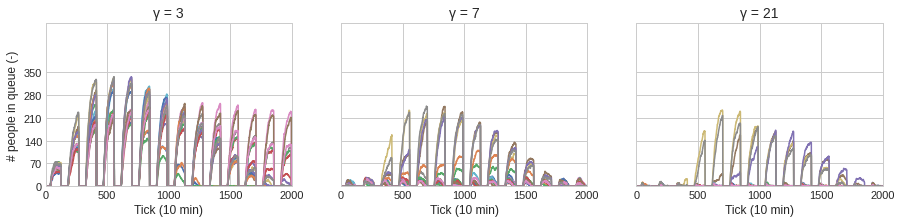

In [143]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

nb_facs = 1
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,3))#,gridspec_kw={'width_ratios': width_ratios})
f=6
for c in range(nb_clusters):
    for i in d[c]:
        
        if input_vars.parallel_served_full[i] == 7.8:


            ax[c].plot(x,data[data.o0==i].iloc[:,f+3])
            ax[c].set_xlim([0,2000])
            ax[c].set_ylim([0,500])
    #         ax[0].set_ylabel("$\mathit{Fac %s}$"%f,rotation='horizontal',fontsize=12)
            ax[c].set_yticks([0,70,140,210,280,350])
            ax[c].set_title(labels[c],fontsize=14)
    ax[c].set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")

plt.show()

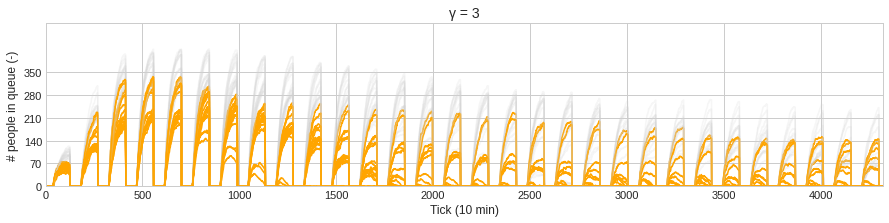

In [144]:
nb_facs = 1
nb_clusters = 1
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,3))#,gridspec_kw={'width_ratios': width_ratios})
f=6
for c in range(nb_clusters):
    for i in d[c]:
        if input_vars.parallel_served_full[i] == 6.0:
            ax.plot(x,data[data.o0==i].iloc[:,f+3],color='lightgrey',alpha=0.2)
        else:
            ax.plot(x,data[data.o0==i].iloc[:,f+3],color='orange')

        ax.set_xlim([0,4320])
        ax.set_ylim([0,500])
#         ax[0].set_ylabel("$\mathit{Fac %s}$"%f,rotation='horizontal',fontsize=12)
        ax.set_yticks([0,70,140,210,280,350])
        ax.set_title(labels[c],fontsize=14)
    ax.set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")

plt.show()

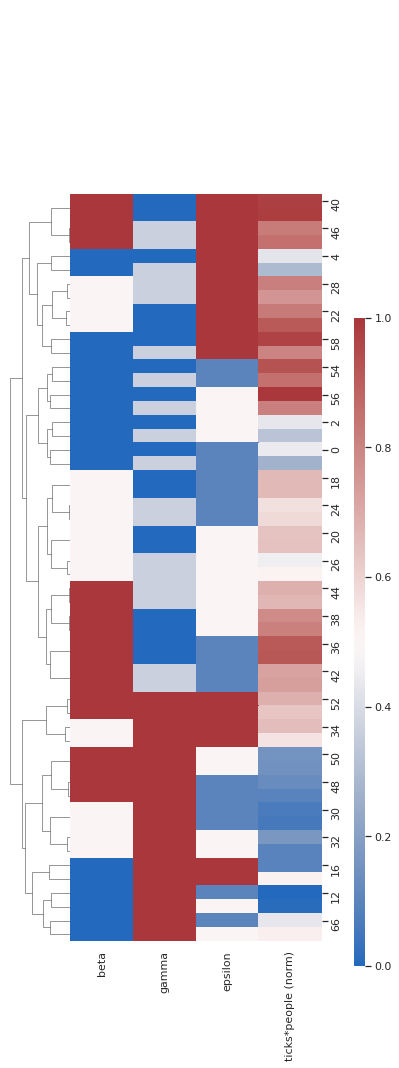

In [153]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o9[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

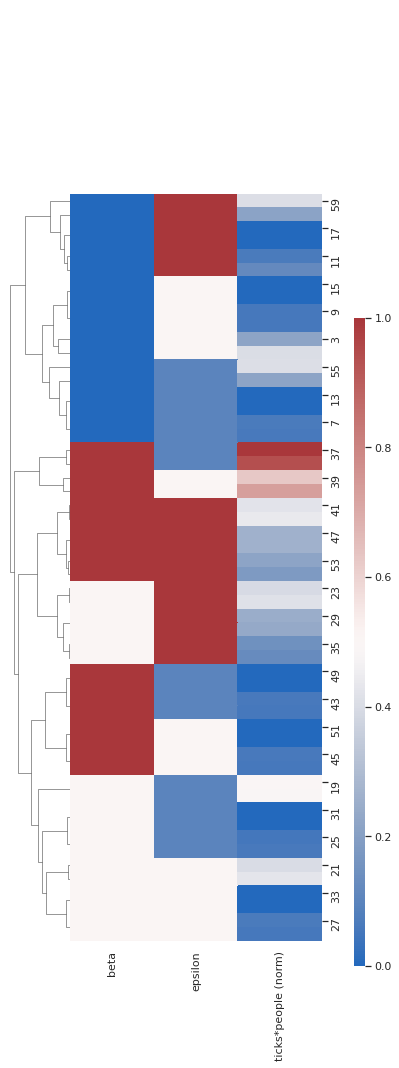

In [152]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o9[data.o0==j]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")